In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Unzip file
import zipfile, os

# Test preprocessing related libraries
import re
import nltk

# Punctuation marks
import string

# Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

# Stemming and Stopwords
stemming = nltk.SnowballStemmer('english')
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Extract the zip file
def extract_zipfiles_from_directory(zip_file_path, dataset_store):

    # Ensure the dataset store directory exists
    os.makedirs(dataset_store, exist_ok=True)
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_store)
            print(f"Extracted '{zip_file_path}' to '{dataset_store}'")
    except Exception as e:
        print(f"Failed to extract '{zip_file_path}': {e}")

In [3]:
file_path = '/content/data/Hate-Speech.zip'
dataset_store = '/content/hate_dataset'

extract_zipfiles_from_directory(file_path, dataset_store)

Extracted '/content/data/Hate-Speech.zip' to '/content/hate_dataset'


In [4]:
# Load dataset
imbalanced_data = pd.read_csv("/content/hate_dataset/imbalanced_data.csv")
raw_data = pd.read_csv("/content/hate_dataset/raw_data.csv")

In [5]:
# Display top & last 5 rows of imbalanced data
imbalanced_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
# Display top & last 5 rows of raw data
raw_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
# Remove un-neccessary columns from both datasets
imbalanced_data.drop(columns=['id'], axis=1, inplace=True)
raw_data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

# I made a few strategies to deal with data.

### 1. Understanding data
### 2. EDA
### 3. Data preprocessing
### 4. Model building, and evaluation
### 5. Model testing

## 1. Understanding Data

In [8]:
class DataExplain:
    def __init__(self, df):
        self.data = df

    def data_looks(self):
        print(f"\t\t\t How data does looks like")
        print(f"\t\t\t Top 5 rows of data: \n")
        print(self.data.head())
        print('-'*90, '\n')
        print(f"\t\t\t Random 5 rows of data: \n")
        print(self.data.sample(5))
        print('-'*90, '\n')
        print(f"\t\t\t Last 5 rows of data: \n")
        print(self.data.tail())
        print('-'*90, '\n')


    def columns_and_types(self):
        print(f"\t\t\t Data shape (rows & columns): \n")
        print(self.data.shape)
        print('-'*45, '\n')

        print(f"\t\t\t Data columns name: \n")
        print(self.data.columns)
        print('-'*45, '\n')

        print(f"\t\t\t Data columns types: \n")
        print(self.data.info())
        print('-'*45, '\n')

    def missing_and_duplicate(self):
        print(f"\t\t\t Data missing values: \n")
        print(self.data.isnull().sum()*100)
        print('-'*45, '\n')

        print(f"\t\t\t Data duplicate values: \n")
        print(self.data.duplicated().sum())
        print('-'*45, '\n')


In [9]:
# class object of imbalanced_data
dataexplian = DataExplain(imbalanced_data)

In [10]:
# Display top, random, and last 5 rows of imbalanced_data
dataexplian.data_looks()

			 How data does looks like
			 Top 5 rows of data: 

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation
------------------------------------------------------------------------------------------ 

			 Random 5 rows of data: 

       label                                              tweet
26342      0  cold/ frio #winter #sÃ£opaulo #brasil #love   ...
628        0   @user happy father's day to all dads except #...
11161      1  @user nazis continue to target jews, businesse...
12105      0  that   moment when the #roti does exactly what...
15057      0  hello ð #inshot #girls #cute #summer #blur ...
-------------------------------------------------------------------------------

In [11]:
# Display shape, columns_name and columns types of imbalanced_data
dataexplian.columns_and_types()

			 Data shape (rows & columns): 

(31962, 2)
--------------------------------------------- 

			 Data columns name: 

Index(['label', 'tweet'], dtype='object')
--------------------------------------------- 

			 Data columns types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB
None
--------------------------------------------- 



In [12]:
# Display missing and duplicate values in imbalanced_data
dataexplian.missing_and_duplicate()

			 Data missing values: 

label    0
tweet    0
dtype: int64
--------------------------------------------- 

			 Data duplicate values: 

2432
--------------------------------------------- 



In [13]:
# class object of raw_data
dataexplian = DataExplain(raw_data)

In [14]:
# Display top, random, and last 5 rows of raw_data
dataexplian.data_looks()

			 How data does looks like
			 Top 5 rows of data: 

   count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
------------------------------------------------------------------------------------------ 

			 Random 5 rows of data: 

       count  hate_speech  offensive_language  neither  class  \
16563      3            1                   2        0      1

In [15]:
# Display shape, columns_name and columns types of raw_data
dataexplian.columns_and_types()

			 Data shape (rows & columns): 

(24783, 6)
--------------------------------------------- 

			 Data columns name: 

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')
--------------------------------------------- 

			 Data columns types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB
None
--------------------------------------------- 



In [16]:
# Display missing and duplicate values in raw_data
dataexplian.missing_and_duplicate()

			 Data missing values: 

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64
--------------------------------------------- 

			 Data duplicate values: 

0
--------------------------------------------- 



## 2. EDA

In [17]:
# imbalanced_data label values
imbalanced_data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

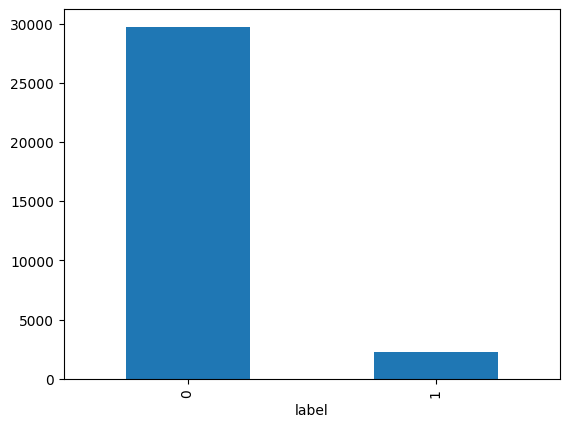

In [18]:
# Bar chart of imbalanced_data column 'label'
imbalanced_data['label'].value_counts().plot(kind= 'bar')
plt.show()

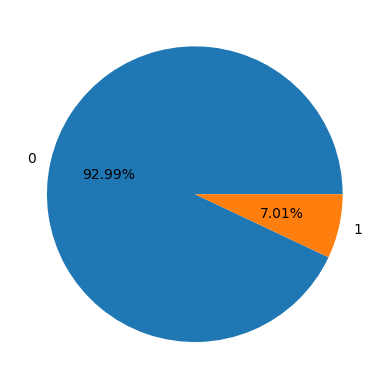

In [19]:
# Pie chart imbalanced_data column 'label'
labels = imbalanced_data['label'].value_counts().index
plt.pie(imbalanced_data['label'].value_counts(), labels=labels, autopct="%.2f%%")
plt.show()

### Observation:

- label 0: no hate
- label 1: hate

In [20]:
# raw_data values
raw_cols = ['count', 'hate_speech', 'offensive_language', 'neither', 'class']
raw_data[raw_cols].value_counts()

count  hate_speech  offensive_language  neither  class
3      0            3                   0        1        13306
       1            2                   0        1         2815
       0            0                   3        2         2753
                    2                   1        1         1384
       2            1                   0        0         1009
                                                          ...  
9      1            1                   7        2            1
       2            4                   3        1            1
                    2                   5        2            1
       6            3                   0        0            1
       7            1                   1        0            1
Name: count, Length: 75, dtype: int64

In [21]:
# Drop columns which are not required
raw_data.drop(columns=['count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)

In [22]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [23]:
# raw_data class unique values
raw_data['class'].unique()

array([2, 1, 0])

In [24]:
# raw_data class values
raw_data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

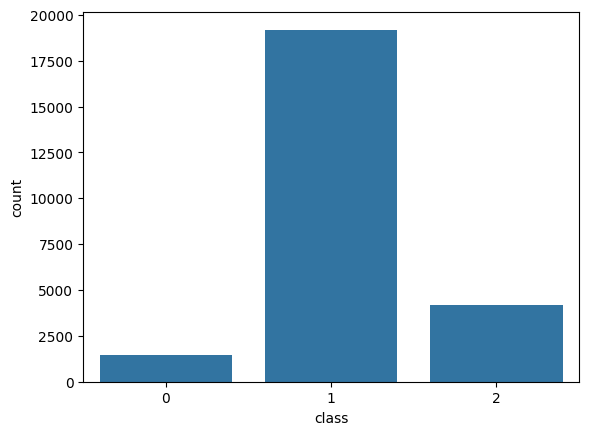

In [25]:
# Plotting the countplot on raw_data 'class' columns
sns.countplot(data= raw_data, x='class')
plt.show()

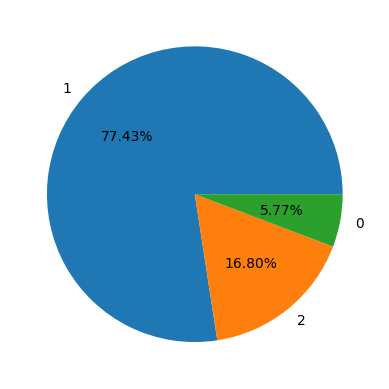

In [26]:
# Pie chart raw_data column 'class'
labels = raw_data['class'].value_counts().index
plt.pie(raw_data['class'].value_counts(), labels=labels, autopct="%.2f%%")
plt.show()

### Observation:

- class 0: hate
- class 1: abusive
- class 2: no hate

In [27]:
# Copy the values of class 1 into class 0.
raw_data[raw_data['class']==0]['class']==1

85       False
89       False
110      False
184      False
202      False
         ...  
24576    False
24685    False
24751    False
24776    False
24777    False
Name: class, Length: 1430, dtype: bool

In [28]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [29]:
raw_data['class'].unique()

array([2, 1, 0])

In [30]:
# Check the value in class 0
raw_data[raw_data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [31]:
# Replace the class 0 to class 1 value
raw_data['class'].replace({0: 1}, inplace=True)

In [32]:
raw_data['class'].unique()

array([2, 1])

In [33]:
# Rename the class 2 to 0
raw_data['class'].replace({2: 0}, inplace=True)

In [34]:
# Change the class name into label
raw_data.rename(columns= {'class': 'label'}, inplace=True)

In [35]:
# Merge the both datasets
final_df = pd.concat([imbalanced_data, raw_data], ignore_index= True)

In [36]:
final_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,0,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [37]:
# class object of final_df
dataexplian = DataExplain(final_df)

In [38]:
# Display top, random, and last 5 rows of final_df
dataexplian.data_looks()

			 How data does looks like
			 Top 5 rows of data: 

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation
------------------------------------------------------------------------------------------ 

			 Random 5 rows of data: 

       label                                              tweet
33422      1  &#8220;@OsmanMasabah: Spitting on people just ...
21115      0                  new @user friday omg can't wait  
7177       1  @user #allahsoil like all religions, islam is ...
33442      1  &#8220;@RedHeadRay_: Is it wrong if I get on t...
37612      1  @brandon_even Them aint the bitches im talkin ...
-------------------------------------------------------------------------------

In [39]:
# Display shape, columns_name and columns types of final_df
dataexplian.columns_and_types()

			 Data shape (rows & columns): 

(56745, 2)
--------------------------------------------- 

			 Data columns name: 

Index(['label', 'tweet'], dtype='object')
--------------------------------------------- 

			 Data columns types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   56745 non-null  int64 
 1   tweet   56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 886.8+ KB
None
--------------------------------------------- 



In [40]:
# Display missing and duplicate values in final_df
dataexplian.missing_and_duplicate()

			 Data missing values: 

label    0
tweet    0
dtype: int64
--------------------------------------------- 

			 Data duplicate values: 

2432
--------------------------------------------- 



In [41]:
# final_df label unique values
final_df['label'].unique()

array([0, 1])

In [42]:
# final_df label values
final_df['label'].value_counts()

label
0    33883
1    22862
Name: count, dtype: int64

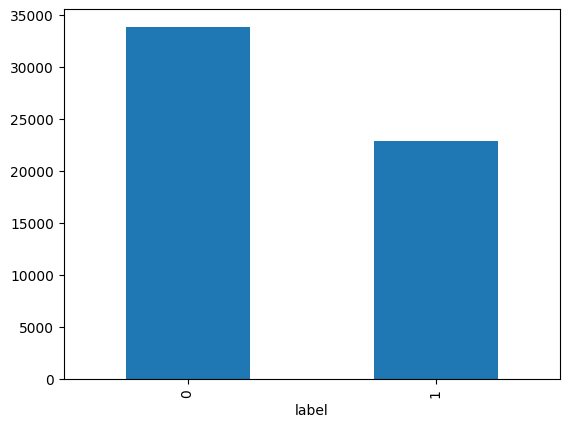

In [43]:
# Bar chart of final_df column 'label'
final_df['label'].value_counts().plot(kind= 'bar')
plt.show()

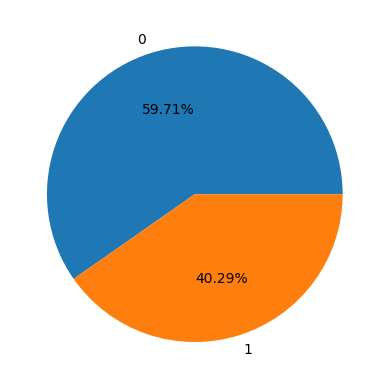

In [44]:
# Pie chart final_df column 'label'
labels = final_df['label'].value_counts().index
plt.pie(final_df['label'].value_counts(), labels=labels, autopct="%.2f%%")
plt.show()

## 3. Data preprocessing

### Basic Cleanup
- Remove HTML tags
- Convert Emoji
- Spell Checking
    - Fast type
    - Fat Fingure Type

### Basic Text Preparation
- Fundamental Basic
    - Number of Characters
    - Word Tokenization
    - Sentence Tokenization

- Optional
    - Lower Case
    - Remove Special Characters, Stop Words, Punctuation, and Digits
    - Stemming, Lemmatization
    - Language Detection

In [45]:
# Fetch number of characters with punctions, digits, and special characters
final_df['num_characters'] = final_df['tweet'].apply(len)

In [46]:
contractions_dict = {
    "won't": "will not",
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am",
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}

In [47]:
# Expand Contractions
def expand_contractions(text, contractions_dict):
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [48]:
# Clean the text data
def data_clean(words):
    words = str(words).lower()
    words = expand_contractions(words, contractions_dict)  # Expand contractions
    words = re.sub(r'[^a-zA-Z0-9\s]', '', words)
    words = re.sub('\[.*?]', "", words)
    words = re.sub('https?://\S+|www\.\S+', "", words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = re.sub(r'\s+', ' ', words).strip()
    words = [word for word in words.split(" ") if word not in stopword]
    words = [stemming.stem(word) for word in words]
    words = " ".join(words)
    return words

In [49]:
final_df['tweet'][1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [50]:
data_clean(" #model   i love u take with u all the time in urÃ°ÂŸÂ“Â±!!! Ã°ÂŸÂ˜Â™Ã°ÂŸÂ˜ÂŽÃ°ÂŸÂ‘Â„Ã°ÂŸÂ‘Â…Ã°ÂŸÂ’Â¦Ã°ÂŸÂ’Â¦Ã°ÂŸÂ’Â¦  ")

'model love u take u time ur'

In [51]:
# Apply data_clean function on tweet data
final_df['tweet_transformed'] = final_df['tweet'].apply(data_clean)

In [52]:
# Display the whole dataset
final_df

,label,tweet,num_characters,tweet_transformed
0,0,@user when a father is dysfunctional and is s...,102,user father dysfunct selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,122,user user thank lyft credit use offer wheelcha...
2,0,bihday your majesty,21,bihday majesti
3,0,#model i love u take with u all the time in ...,86,model love u take u time ur
4,0,factsguide: society now #motivation,39,factsguid societi motiv
...,...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,146,muthafin lie coreyemanuel right tl trash mine ...
56741,0,"you've gone and broke the wrong heart baby, an...",70,gone broke wrong heart babi drove redneck crazi
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,67,young buck wanna eat dat nigguh like aint fuck...
56743,1,youu got wild bitches tellin you lies,37,youu got wild bitch tellin lie


In [53]:
# Make wordCloud
from wordcloud import WordCloud
wc = WordCloud(width = 700, height = 700, min_font_size = 10, background_color = 'white')

In [54]:
# Generate wordcloud on hate tweets
hate_wc = wc.generate(final_df[final_df['label'] == 1]['tweet_transformed'].str.cat(sep= " "))

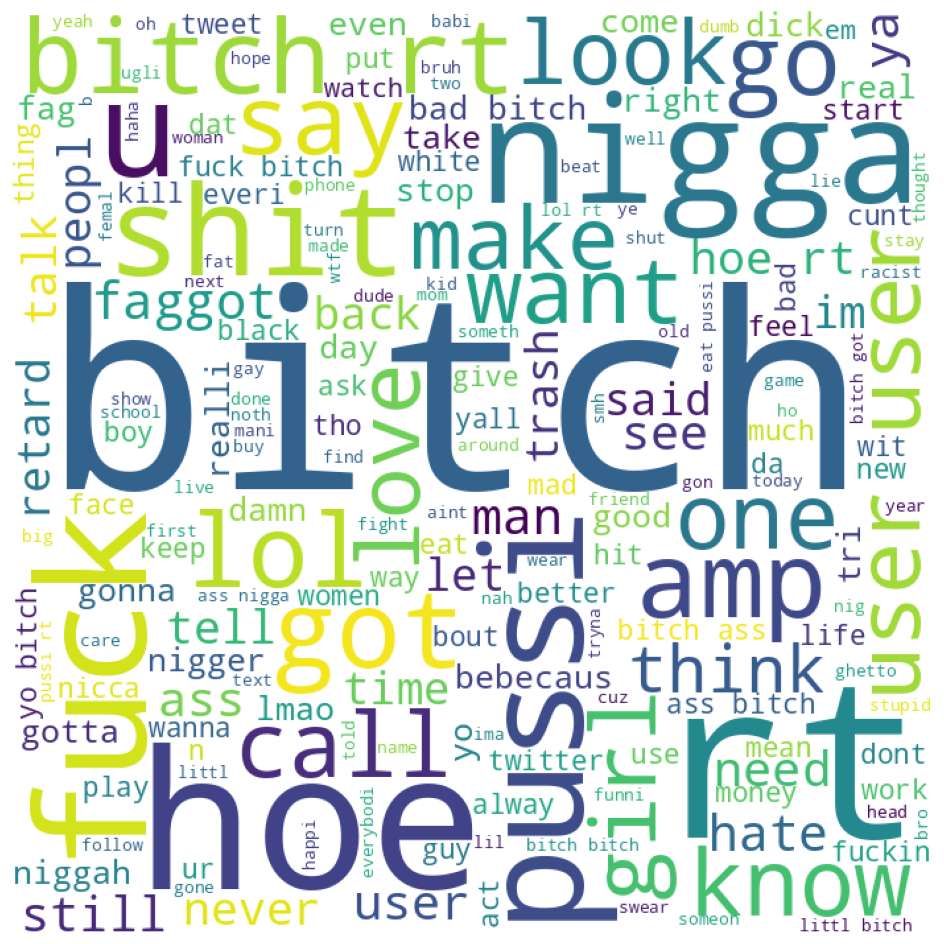

In [55]:
# Graph the word cloud of hate tweets
plt.figure(figsize=(25,12))
plt.imshow(hate_wc)
plt.style.use('classic')
plt.axis('off')
plt.show()

In [56]:
# Generate wordcloud on no-hate tweets
no_hate_wc = wc.generate(final_df[final_df['label'] == 0]['tweet_transformed'].str.cat(sep= " "))

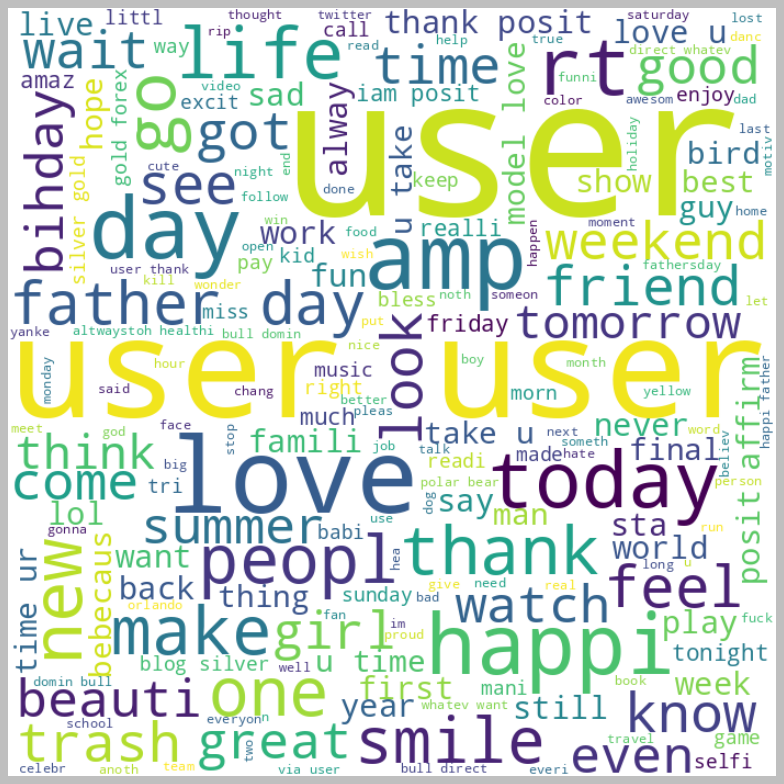

In [57]:
# Graph the word cloud of no-hate tweets
plt.figure(figsize=(25,12))
plt.imshow(no_hate_wc)
plt.style.use('classic')
plt.axis('off')
plt.show()

In [58]:
# Top occuring Words in hate tweets
hate_corpus = []

for tweet in final_df[final_df['label'] == 1]['tweet_transformed']:
    for word in tweet.split():
        hate_corpus.append(word)

In [59]:
# Length of hate tweets words
len(hate_corpus)

183422

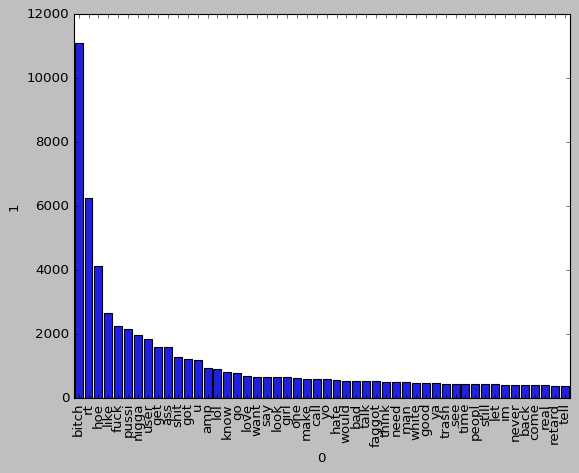

In [60]:
from collections import Counter

a = pd.DataFrame(Counter(hate_corpus).most_common(50))[0]
b = pd.DataFrame(Counter(hate_corpus).most_common(50))[1]

sns.barplot(x=a, y=b)
plt.xticks(rotation= 'vertical')
plt.show()

In [61]:
# Top occuring Words in no-hate tweets
no_hate_corpus = []

for tweet in final_df[final_df['label'] == 0]['tweet_transformed']:
    for word in tweet.split():
        no_hate_corpus.append(word)

In [62]:
# Length of no-hate tweets words
len(no_hate_corpus)

275433

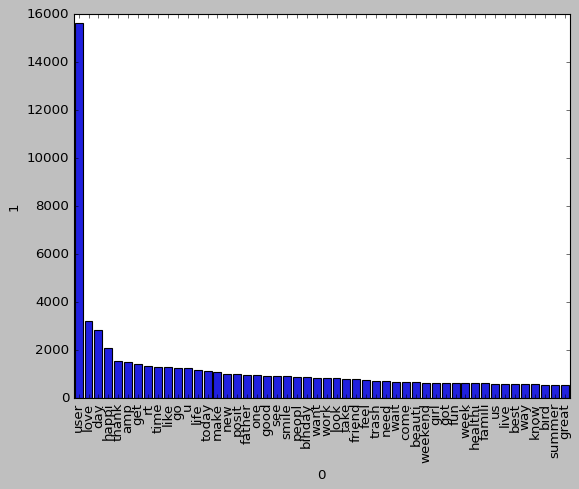

In [63]:
c = pd.DataFrame(Counter(no_hate_corpus).most_common(50))[0]
d = pd.DataFrame(Counter(no_hate_corpus).most_common(50))[1]

sns.barplot(x=c, y=d)
plt.xticks(rotation= 'vertical')
plt.show()

In [64]:
# Split data into X,y features
X = final_df['tweet_transformed']
y = final_df['label']

In [65]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

In [66]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [67]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

45396 45396
11349 11349


## 4. Model building, and evaluation

In [68]:
# Use Tensorflow & Keras library
import tensorflow as tf
from tensorflow import keras

# Tokenization with keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Metrics measure
from sklearn.metrics import confusion_matrix

In [69]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [79]:
# Ensure TensorFlow uses the GPU
if tf.config.list_physical_devices('GPU'):
    with tf.device('/GPU:0'):
        # Perform Tokenization
        max_words = 50000
        max_len = 300

        tokenizer = Tokenizer(num_words=max_words)
        tokenizer.fit_on_texts(X_train)

        sequences = tokenizer.texts_to_sequences(X_train)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Creating model architecture
        def txt_classifier(max_words, max_len):
            model = keras.Sequential([
                keras.layers.Embedding(max_words, 100, input_length=max_len),
                keras.layers.SpatialDropout1D(0.2),
                keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
                keras.layers.LSTM(60, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
                keras.layers.SpatialDropout1D(0.1),
                keras.layers.LSTM(20, dropout=0.1, recurrent_dropout=0.1),
                keras.layers.Dense(1, activation='sigmoid'),
            ])

            model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

            return model

        # Save your untrained model
        model = txt_classifier(max_words, max_len)

        # Model detailed summary
        model.summary()
        print("\n")
        print("Start Model Training")
        print("="*66)

        # Callback class for early stopping based on validation accuracy
        class myCallBack(keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs={}):
                if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.94:
                    print("\nReached 94% validation accuracy, so cancelling training! \n")
                    self.model.stop_training = True

        # Instantiate the callback class
        callback = myCallBack()

        # Train model
        history = model.fit(sequences_matrix, y_train, batch_size=128, callbacks=[callback], epochs=3, verbose=1, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d_2 (Spati  (None, 300, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_3 (LSTM)               (None, 300, 100)          80400     
                                                                 
 lstm_4 (LSTM)               (None, 300, 75)           52800     
                                                                 
 spatial_dropout1d_3 (Spati  (None, 300, 75)           0         
 alDropout1D)                                                    
                                                                 
 lstm_5 (LSTM)               (None, 50)               

In [80]:
# Test model
test_sequence = tokenizer.texts_to_sequences(X_test)
test_sequence_matrix = pad_sequences(test_sequence, maxlen= max_len)

In [81]:
# Model evaluation
model_acc = model.evaluate(test_sequence_matrix, y_test)

355/355 [==============================] - 103s 291ms/step - loss: 0.2011 - accuracy: 0.9411


In [82]:
model_acc

[0.2011125683784485, 0.9410520792007446]

In [73]:
model_acc

[0.16982480883598328, 0.9421094655990601]

In [83]:
# Prediction
y_pred = model.predict(test_sequence_matrix)

355/355 [==============================] - 91s 255ms/step


In [84]:
# Perform prediction
res = []

for prediction in y_pred:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [85]:
print(confusion_matrix(y_test, res))

[[6482  254]
 [ 415 4198]]


In [76]:
print(confusion_matrix(y_test, res))

[[6508  228]
 [ 429 4184]]


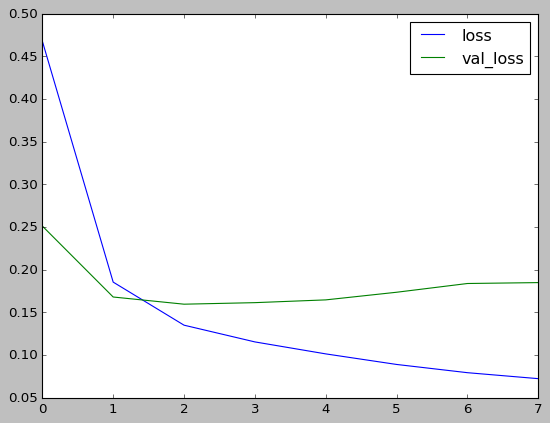

In [86]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

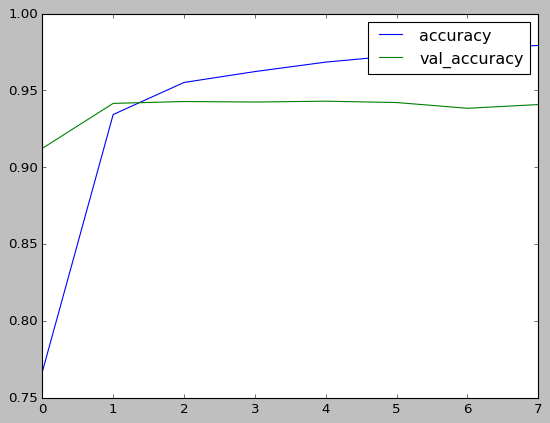

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [88]:
# Save tokenizer and also save the model if you want
import pickle
with open('/content/hate_dataset/tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f, protocol= pickle.HIGHEST_PROTOCOL)

In [89]:
# Save model
model.save('/content/hate_dataset/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5. Model Testing

In [90]:
load_clf = keras.models.load_model('/content/hate_dataset/model.h5')
with open('/content/hate_dataset/tokenizer.pickle', 'rb') as f:
    load_token = pickle.load(f)

In [91]:
user_txt = "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;"
user_txt

"!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;"

In [92]:
user_test = [data_clean(user_txt)]
print(user_test)

['tire big bitch come us skinni']


In [93]:
seq = load_token.texts_to_sequences(user_test)
padded = pad_sequences(seq, maxlen= 300)

In [94]:
seq

[[433, 127, 2, 40, 53, 1172]]

In [95]:
pred = load_clf.predict(padded)

1/1 [==============================] - 1s 755ms/step


In [96]:
pred

array([[0.99057215]], dtype=float32)

In [97]:
if pred < 0.5:
    print("No Hate")
else:
    print("Hate and Abusive")

Hate and Abusive
